# Cleaning Weather Data for Use in Uber Movement Model

In [137]:
import pandas as pd
import numpy as np

## Import Weather Data from 2016-2019

In [138]:
weather_airport = pd.read_csv("weather.csv")

In [139]:
weather_airport.columns

Index(['Local time in Cape Town (airport)', 'T', 'Po', 'P', 'Pa', 'U', 'DD',
       'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H',
       'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [140]:
weather_airport = weather_airport.rename(columns={"Local time in Cape Town (airport)" : "Local Time"})

### Cheking for Missing Information

In [141]:
import missingno as msno
from datetime import datetime, date

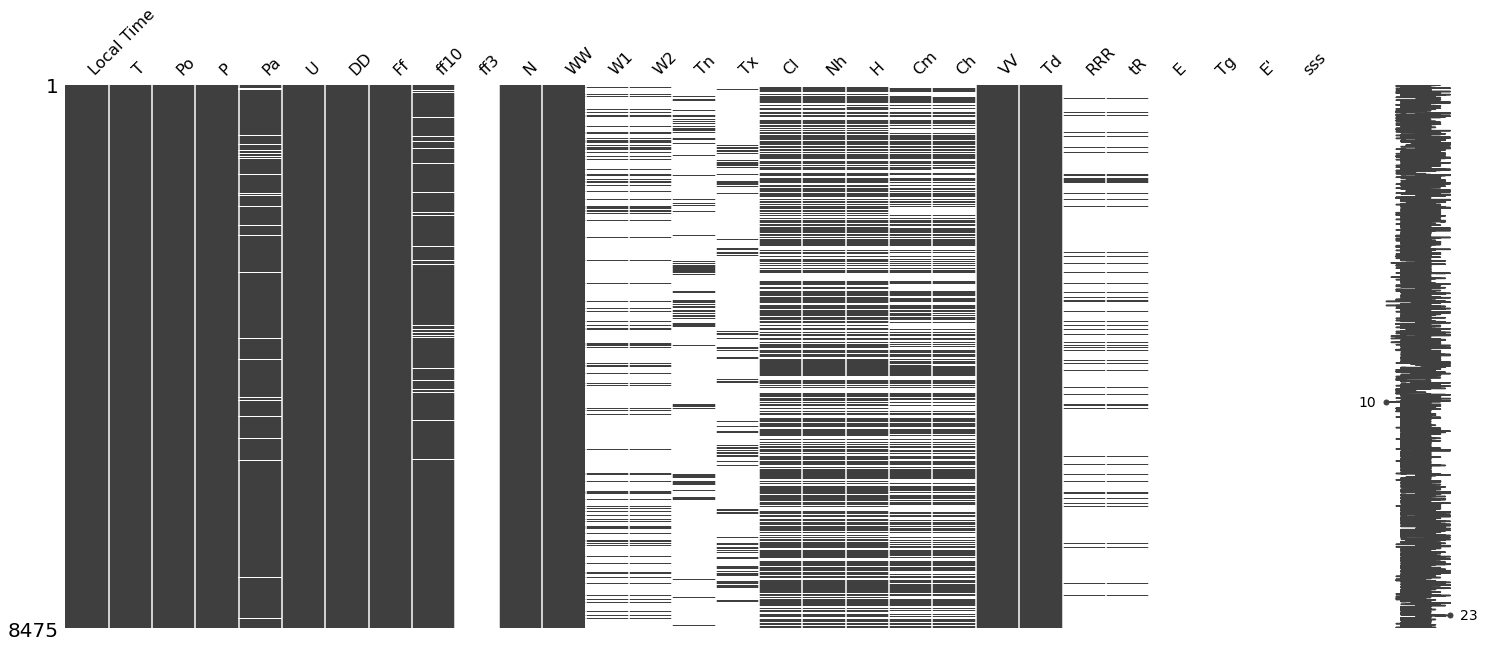

In [142]:
msno.matrix(weather_airport)

### Dropping Columns with too many missing values and all non-numerical columns

In [143]:
weather_airport = weather_airport.drop(columns =
['RRR', 'tR', 'Tg', 'sss', "E'", 'ff3','Tx', 'Tn', 'Cl', 'W1', 'W2','H', 'Nh', 'Cm', 'Ch', 'N', 'WW', 'DD', "E"])

In [144]:
weather_airport.head()

,Local Time,T,Po,P,Pa,U,Ff,ff10,VV,Td
0,01.01.2019 23:00,18.4,761.7,765.8,2.6,68.0,10.0,13.0,20.0,12.3
1,01.01.2019 20:00,26.9,759.1,763.0,0.0,45.0,5.0,10.0,71.0,13.9
2,01.01.2019 17:00,26.9,759.1,763.0,0.0,45.0,5.0,8.0,71.0,13.9
3,01.01.2019 14:00,26.9,759.1,763.0,0.2,45.0,5.0,8.0,30.0,13.9
4,01.01.2019 11:00,23.8,758.9,763.0,0.4,49.0,3.0,6.0,30.0,12.5


### Change Local Time to datetime datatype

In [145]:
from datetime import datetime, date

In [146]:
weather_airport = weather_airport.sort_values("Local Time")

In [147]:
weather_airport["Local Time"] = pd.to_datetime(weather_airport['Local Time'])

In [148]:
weather_airport.head()

,Local Time,T,Po,P,Pa,U,Ff,ff10,VV,Td
8461,2016-01-01 02:00:00,20.9,756.3,760.3,NaN,87.0,4.0,8.0,30.0,18.6
8460,2016-01-01 08:00:00,21.6,757.1,761.2,NaN,80.0,3.0,4.0,12.0,18.0
8459,2016-01-01 11:00:00,28.1,757.6,761.5,0.5,58.0,4.0,6.0,20.0,19.1
8458,2016-01-01 14:00:00,27.5,758.2,762.1,0.6,64.0,9.0,11.0,20.0,20.0
8457,2016-01-01 17:00:00,26.5,758.1,762.2,-0.1,63.0,9.0,11.0,30.0,18.9


### Replace null values with column means

In [149]:
pa_mean = weather_airport.Pa.mean()
weather_airport.Pa = weather_airport.Pa.fillna(pa_mean)

In [150]:
ff10_mean = weather_airport.ff10.mean()
weather_airport.ff10 = weather_airport.ff10.fillna(ff10_mean)

In [151]:
Ff_mean = weather_airport.Ff.mean()
weather_airport.Ff = weather_airport.Ff.fillna(Ff_mean)

In [152]:
td_mean = weather_airport.Td.mean()
weather_airport.Td = weather_airport.Td.fillna(td_mean)

In [153]:
VV_mean = weather_airport.VV.mean()
weather_airport.VV = weather_airport.VV.fillna(VV_mean)

In [154]:
weather_airport = weather_airport.set_index('Local Time')

In [155]:
weather_airport[weather_airport["T"].isnull()] ## 2018-07-03 & 2016-06-17, rows 2306 & 7177

,T,Po,P,Pa,U,Ff,ff10,VV,Td
Local Time,,,,,,,,,
2018-07-03 08:00:00,NaN,755.2,759.3,0.5,NaN,9.0,11.0,30.0,16.2
2016-06-17 05:00:00,NaN,762.7,766.9,-1.7,NaN,7.0,8.0,0.7,7.6


In [156]:
temp1_index = weather_airport['2018-07-04 08:00:00']
temp2_index = weather_airport['2018-07-04 08:00:00']
temp1_index['T'] ## 13.7
temp2_index['T'] ## 13.7
mean_temp = 13.7

In [157]:
weather_airport.loc['2018-07-03 08:00:00', "T"] = 13.7
weather_airport['2018-07-03 08:00:00']

,T,Po,P,Pa,U,Ff,ff10,VV,Td
Local Time,,,,,,,,,
2018-07-03 08:00:00,13.7,755.2,759.3,0.5,NaN,9.0,11.0,30.0,16.2


In [158]:
temp3_index = weather_airport['2016-06-16 05:00:00']
temp4_index = weather_airport['2016-06-18 05:00:00']
temp3_index['T']  ## 9.5
temp4_index['T']  ## 8.0
mean_temp = 8.75

In [159]:
weather_airport.loc['2016-06-17 05:00:00', "T"] = mean_temp
weather_airport['2016-06-17 05:00:00']

,T,Po,P,Pa,U,Ff,ff10,VV,Td
Local Time,,,,,,,,,
2016-06-17 05:00:00,8.75,762.7,766.9,-1.7,NaN,7.0,8.0,0.7,7.6


In [160]:
mean_p_index = weather_airport.P.mean()

In [161]:
weather_airport.P = weather_airport.P.fillna(mean_p_index)

In [162]:
mean_u_index = weather_airport.U.mean()

In [163]:
weather_airport.U = weather_airport.P.fillna(mean_u_index)

In [164]:
weather_airport = weather_airport.asfreq(freq = "H")

In [165]:
weather_airport = weather_airport.ffill(axis=0)

In [166]:
weather_airport = weather_airport.reset_index()

In [167]:
weather_airport['Local Time'] = weather_airport['Local Time'].astype('O')

In [168]:
weather_airport = weather_airport.rename(columns= {'Local Time': 'datetime'})

In [169]:
weather_airport.to_csv("weather_cleaned.csv")